Column names in the Excel file: Index(['kx', 'ky', 'band', 'sx', 'sy', 'sz'], dtype='object')


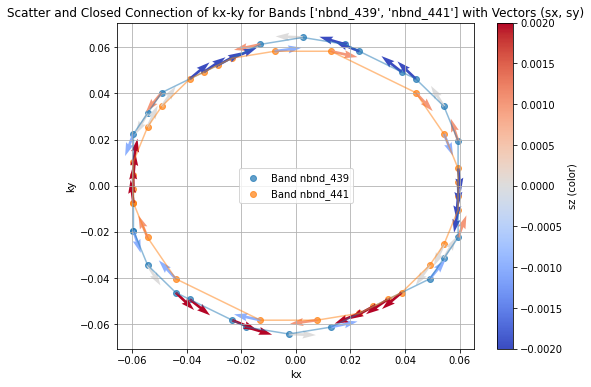

In [1]:
#To join the nearest neighbour forming a close loop of kx,ky.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the Excel file (replace with your actual file path)
file_path = 'spin_expectations_at_iso-surface.csv'  # Update with your actual Excel file path
df = pd.read_csv(file_path)  # Use read_excel instead of read_csv for Excel files

# Inspect the column names to check if there are any issues
print("Column names in the Excel file:", df.columns)

# If needed, strip leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Assuming there's a column named 'band' to group by bands
bands = df['band']  # Replace 'band' with the actual column name if different

# Specify the bands you want to plot
bands_to_plot = ['nbnd_439','nbnd_441']  # Add the specific bands you want to plot (e.g., [1, 3])

# Filter the dataframe to include only the bands you want to plot
df_filtered = df[df['band'].isin(bands_to_plot)]

# Extract the columns
kx = df_filtered['kx']  # Replace 'kx' with the actual column name if different
ky = df_filtered['ky']  # Replace 'ky' with the actual column name if different
sx = df_filtered['sx']  # Replace 'sx' with the actual column name if different
sy = df_filtered['sy']  # Replace 'sy' with the actual column name if different
sz = df_filtered['sz']  # Replace 'sz' with the actual column name if different

# Create the figure
plt.figure(figsize=(8, 6))

# Function to calculate the distance between two points (kx1, ky1) and (kx2, ky2)
def calc_distance(kx1, ky1, kx2, ky2):
    return np.sqrt((kx2 - kx1) ** 2 + (ky2 - ky1) ** 2)

# Group by the 'band' column and process each selected band
for band, group in df_filtered.groupby('band'):
    # List of points (kx, ky)
    points = group[['kx', 'ky']].values
    sorted_points = [points[0]]  # Start with the first point
    remaining_points = list(points[1:])
    
    while remaining_points:
        # Get the last point in the sorted list
        last_point = sorted_points[-1]
        # Calculate distances from the last point to all remaining points
        distances = [calc_distance(last_point[0], last_point[1], p[0], p[1]) for p in remaining_points]
        # Find the index of the closest point
        closest_index = np.argmin(distances)
        # Add the closest point to the sorted list
        sorted_points.append(remaining_points.pop(closest_index))
    
    # Convert the sorted points to numpy array
    sorted_points = np.array(sorted_points)
    
    # Close the loop by adding the first point at the end to connect the last point back to the first point
    sorted_points = np.vstack([sorted_points, sorted_points[0]])

    # Scatter plot of kx and ky for this band
    plt.scatter(sorted_points[:, 0], sorted_points[:, 1], label=f'Band {band}', alpha=0.7)
    
    # Plot a line connecting kx and ky points sorted by closest neighbor (with closed loop)
    plt.plot(sorted_points[:, 0], sorted_points[:, 1], linestyle='-', alpha=0.5)

# Create a quiver plot with kx, ky as the origin, sx, sy as the vectors, and color by sz
quiver = plt.quiver(kx, ky, sx, sy, sz, scale=50, scale_units='xy', cmap='coolwarm')

# Add a color bar to show the color scale of sz
plt.colorbar(quiver, label='sz (color)')

# Label the axes
plt.xlabel('kx')
plt.ylabel('ky')

# Set the plot title
plt.title(f'Scatter and Closed Connection of kx-ky for Bands {bands_to_plot} with Vectors (sx, sy)')

# Show the plot
plt.grid(True)
plt.legend()
plt.show()

Column names in the csv file: Index(['kx', 'ky', 'band', 'sx', 'sy', 'sz'], dtype='object')


/tmp/ipykernel_117792/1362048968.py:83: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


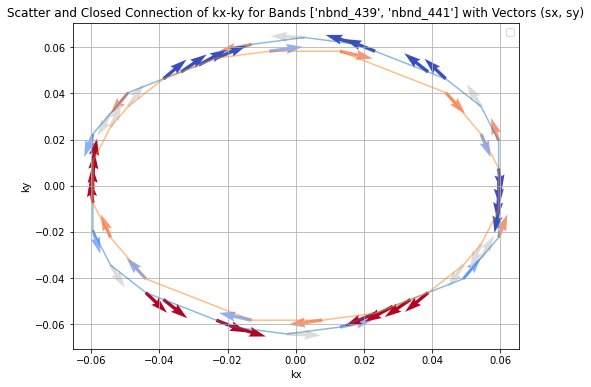

In [2]:
#To join the nearest neighbour forming a close loop of kx,ky without scatter plot
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the Excel file (replace with your actual file path)
file_path = 'spin_expectations_at_iso-surface.csv'  # Update with your actual Excel file path
df = pd.read_csv(file_path)  # Use read_excel instead of read_csv for Excel files

# Inspect the column names to check if there are any issues
print("Column names in the csv file:", df.columns)

# If needed, strip leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Assuming there's a column named 'band' to group by bands
bands = df['band']  # Replace 'band' with the actual column name if different

# Specify the bands you want to plot
bands_to_plot = ['nbnd_439','nbnd_441']  # Add the specific bands you want to plot (e.g., [1, 3])

# Filter the dataframe to include only the bands you want to plot
df_filtered = df[df['band'].isin(bands_to_plot)]

# Extract the columns
kx = df_filtered['kx']  # Replace 'kx' with the actual column name if different
ky = df_filtered['ky']  # Replace 'ky' with the actual column name if different
sx = df_filtered['sx']  # Replace 'sx' with the actual column name if different
sy = df_filtered['sy']  # Replace 'sy' with the actual column name if different
sz = df_filtered['sz']  # Replace 'sz' with the actual column name if different

# Create the figure
plt.figure(figsize=(8, 6))

# Function to calculate the distance between two points (kx1, ky1) and (kx2, ky2)
def calc_distance(kx1, ky1, kx2, ky2):
    return np.sqrt((kx2 - kx1) ** 2 + (ky2 - ky1) ** 2)

# Group by the 'band' column and process each selected band
for band, group in df_filtered.groupby('band'):
    # List of points (kx, ky)
    points = group[['kx', 'ky']].values
    sorted_points = [points[0]]  # Start with the first point
    remaining_points = list(points[1:])
    
    while remaining_points:
        # Get the last point in the sorted list
        last_point = sorted_points[-1]
        # Calculate distances from the last point to all remaining points
        distances = [calc_distance(last_point[0], last_point[1], p[0], p[1]) for p in remaining_points]
        # Find the index of the closest point
        closest_index = np.argmin(distances)
        # Add the closest point to the sorted list
        sorted_points.append(remaining_points.pop(closest_index))
    
    # Convert the sorted points to numpy array
    sorted_points = np.array(sorted_points)
    
    # Close the loop by adding the first point at the end to connect the last point back to the first point
    sorted_points = np.vstack([sorted_points, sorted_points[0]])

    # Scatter plot of kx and ky for this band
    #plt.scatter(sorted_points[:, 0], sorted_points[:, 1], label=f'Band {band}', alpha=0.7)
    
    # Plot a line connecting kx and ky points sorted by closest neighbor (with closed loop)
    plt.plot(sorted_points[:, 0], sorted_points[:, 1], linestyle='-', alpha=0.5)

# Create a quiver plot with kx, ky as the origin, sx, sy as the vectors, and color by sz
quiver = plt.quiver(kx, ky, sx, sy,sz,scale=50, scale_units='xy',cmap='coolwarm')

# Add a color bar to show the color scale of sz
#plt.colorbar(quiver, label='sz (color)')

# Label the axes
plt.xlabel('kx')
plt.ylabel('ky')

# Set the plot title
plt.title(f'Scatter and Closed Connection of kx-ky for Bands {bands_to_plot} with Vectors (sx, sy)')

# Show the plot
plt.grid(True)
plt.legend()
plt.show()


Column names in the csv file: Index(['kx', 'ky', 'band', 'sx', 'sy', 'sz'], dtype='object')


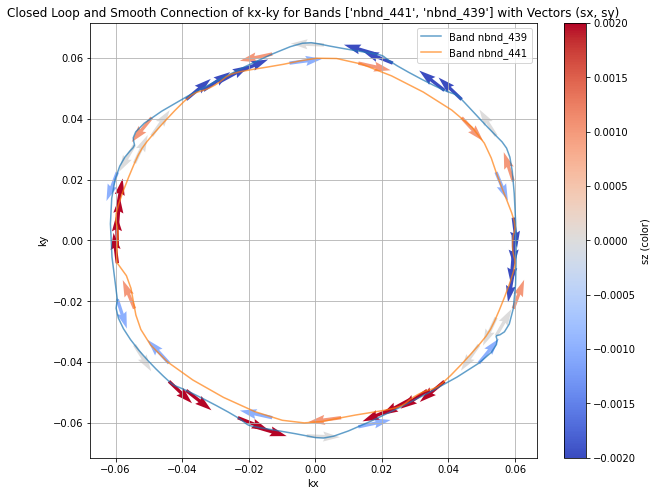

In [7]:
#interploating kx,ky data 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline

# Load the Excel file (replace with your actual file path)
file_path = 'spin_expectations_at_iso-surface.csv'  # Update with your actual Excel file path
df = pd.read_csv(file_path)  # Use read_excel instead of read_csv for Excel files

# Inspect the column names to check if there are any issues
print("Column names in the csv file:", df.columns)

# If needed, strip leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Assuming there's a column named 'band' to group by bands
bands = df['band']  # Replace 'band' with the actual column name if different

# Specify the bands you want to plot
bands_to_plot = ['nbnd_441','nbnd_439']  # Add the specific bands you want to plot (e.g., [1, 3])

# Filter the dataframe to include only the bands you want to plot
df_filtered = df[df['band'].isin(bands_to_plot)]

# Extract the columns
kx = df_filtered['kx']  # Replace 'kx' with the actual column name if different
ky = df_filtered['ky']  # Replace 'ky' with the actual column name if different
sx = df_filtered['sx']  # Replace 'sx' with the actual column name if different
sy = df_filtered['sy']  # Replace 'sy' with the actual column name if different
sz = df_filtered['sz']  # Replace 'sz' with the actual column name if different

# Create the figure
plt.figure(figsize=(10, 8))

# Function to calculate the distance between two points (kx1, ky1) and (kx2, ky2)
def calc_distance(kx1, ky1, kx2, ky2):
    return np.sqrt((kx2 - kx1) ** 2 + (ky2 - ky1) ** 2)

# Function to sort points and ensure closed loop
def sort_and_close_loop(points):
    num_points = len(points)
    # Sort points by closest neighbor to form a continuous path
    sorted_points = [points[0]]
    remaining_points = list(points[1:])
    
    while remaining_points:
        last_point = sorted_points[-1]
        distances = [calc_distance(last_point[0], last_point[1], p[0], p[1]) for p in remaining_points]
        closest_index = np.argmin(distances)
        sorted_points.append(remaining_points.pop(closest_index))
    
    sorted_points = np.array(sorted_points)
    # Close the loop by adding the first point at the end
    return np.vstack([sorted_points, sorted_points[0]])

# Group by the 'band' column and process each selected band
for band, group in df_filtered.groupby('band'):
    # List of points (kx, ky)
    points = group[['kx', 'ky']].values
    
    # Ensure points form a closed loop
    closed_loop_points = sort_and_close_loop(points)
    
    # Perform cubic spline interpolation
    num_points = len(closed_loop_points)
    t = np.arange(num_points)
    t_new = np.linspace(0, num_points - 1, 100)  # New parameter for smooth curve
    cs_x = CubicSpline(t, closed_loop_points[:, 0])
    cs_y = CubicSpline(t, closed_loop_points[:, 1])
    smooth_x = cs_x(t_new)
    smooth_y = cs_y(t_new)
    
    # Plot the smooth closed loop line connecting kx and ky points
    plt.plot(smooth_x, smooth_y, linestyle='-', alpha=0.7, label=f'Band {band}')

# Create a quiver plot with kx, ky as the origin, sx, sy as the vectors, and color by sz
quiver = plt.quiver(kx, ky, sx, sy, sz, scale=50, scale_units='xy', cmap='coolwarm')

# Add a color bar to show the color scale of sz
plt.colorbar(quiver, label='sz (color)')

# Label the axes
plt.xlabel('kx')
plt.ylabel('ky')

# Set the plot title
plt.title(f'Closed Loop and Smooth Connection of kx-ky for Bands {bands_to_plot} with Vectors (sx, sy)')

# Show the plot
plt.grid(True)
plt.legend()
plt.show()

Column names in the Excel file: Index(['kx', 'ky', 'band', 'sx', 'sy', 'sz'], dtype='object')


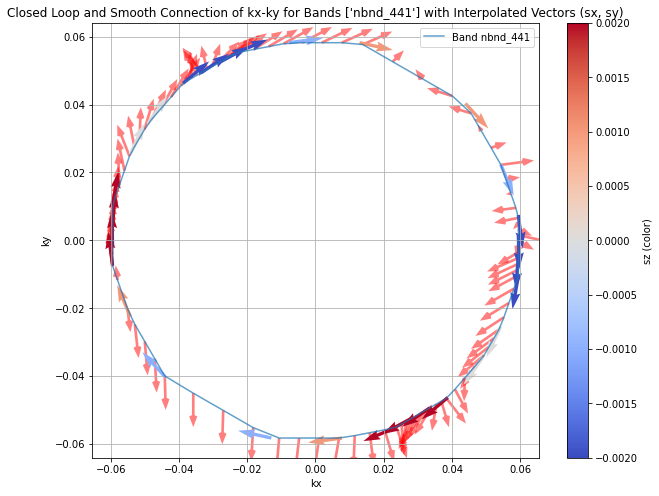

In [8]:
#To interpolate kx,ky,sx,sy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline
from scipy.interpolate import interp1d

# Load the Excel file (replace with your actual file path)
file_path = 'spin_expectations_at_iso-surface.csv'  # Update with your actual Excel file path
df = pd.read_csv(file_path)  # Use read_excel instead of read_csv for Excel files

# Inspect the column names to check if there are any issues
print("Column names in the Excel file:", df.columns)

# If needed, strip leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Assuming there's a column named 'band' to group by bands
bands = df['band']  # Replace 'band' with the actual column name if different

# Specify the bands you want to plot
bands_to_plot = ['nbnd_441']  # Add the specific bands you want to plot (e.g., [1, 3])

# Filter the dataframe to include only the bands you want to plot
df_filtered = df[df['band'].isin(bands_to_plot)]

# Extract the columns
kx = df_filtered['kx']  # Replace 'kx' with the actual column name if different
ky = df_filtered['ky']  # Replace 'ky' with the actual column name if different
sx = df_filtered['sx']  # Replace 'sx' with the actual column name if different
sy = df_filtered['sy']  # Replace 'sy' with the actual column name if different
sz = df_filtered['sz']  # Replace 'sz' with the actual column name if different

# Normalize or clip sx and sy values to the range [-0.5, 0.5]
sx = np.clip(sx, -0.5, 0.5)
sy = np.clip(sy, -0.5, 0.5)

# Create the figure
plt.figure(figsize=(10, 8))

# Function to calculate the distance between two points (kx1, ky1) and (kx2, ky2)
def calc_distance(kx1, ky1, kx2, ky2):
    return np.sqrt((kx2 - kx1) ** 2 + (ky2 - ky1) ** 2)

# Function to sort points and ensure closed loop
def sort_and_close_loop(points):
    num_points = len(points)
    if num_points <= 1:
        raise ValueError("Not enough points to create a closed loop.")
    sorted_points = [points[0]]
    remaining_points = list(points[1:])
    
    while remaining_points:
        last_point = sorted_points[-1]
        distances = [calc_distance(last_point[0], last_point[1], p[0], p[1]) for p in remaining_points]
        closest_index = np.argmin(distances)
        sorted_points.append(remaining_points.pop(closest_index))
    
    sorted_points = np.array(sorted_points)
    # Close the loop by adding the first point at the end
    return np.vstack([sorted_points, sorted_points[0]])

# Group by the 'band' column and process each selected band
for band, group in df_filtered.groupby('band'):
    # List of points (kx, ky)
    points = group[['kx', 'ky']].values
    sx_values = group['sx'].values
    sy_values = group['sy'].values
    
    # Ensure proper lengths
    assert len(sx_values) == len(points), f"Length of sx_values ({len(sx_values)}) does not match length of points ({len(points)})"
    assert len(sy_values) == len(points), f"Length of sy_values ({len(sy_values)}) does not match length of points ({len(points)})"
    
    # Ensure points form a closed loop
    closed_loop_points = sort_and_close_loop(points)
    num_points = len(closed_loop_points)
    t = np.arange(num_points)
    
    # Close loop vectors
    closed_loop_sx = np.concatenate([sx_values, [sx_values[0]]])
    closed_loop_sy = np.concatenate([sy_values, [sy_values[0]]])
    
    # Perform cubic spline interpolation
    t_new = np.linspace(0, num_points - 1, 100)  # New parameter for smooth curve
    cs_x = interp1d(t, closed_loop_points[:, 0])
    cs_y = interp1d(t, closed_loop_points[:, 1])
    smooth_x = cs_x(t_new)
    smooth_y = cs_y(t_new)
    
    # Interpolate sx and sy at the new smooth kx, ky
    cs_sx = interp1d(t, closed_loop_sx)
    cs_sy = interp1d(t, closed_loop_sy)
    smooth_sx = cs_sx(t_new)
    smooth_sy = cs_sy(t_new)
    
    # Ensure that the lengths match for smooth_x, smooth_y, smooth_sx, smooth_sy
    if len(smooth_x) != len(smooth_sx):
        raise ValueError("Lengths of smooth_x and smooth_sx do not match.")
    if len(smooth_y) != len(smooth_sy):
        raise ValueError("Lengths of smooth_y and smooth_sy do not match.")
    
    # Close the loop for interpolated sx and sy
    smooth_x = np.append(smooth_x, smooth_x[0])
    smooth_y = np.append(smooth_y, smooth_y[0])
    smooth_sx = np.append(smooth_sx, smooth_sx[0])
    smooth_sy = np.append(smooth_sy, smooth_sy[0])
    
    # Plot the smooth closed loop line connecting kx and ky points
    plt.plot(smooth_x, smooth_y, linestyle='-', alpha=0.7, label=f'Band {band}')
    
    # Plot the smooth vectors
    plt.quiver(smooth_x, smooth_y, smooth_sx, smooth_sy, scale=50, scale_units='xy', angles='xy', color='r', alpha=0.5, headlength=4)

# Create a quiver plot with kx, ky as the origin, sx, sy as the vectors, and color by sz
quiver = plt.quiver(kx, ky, sx, sy, sz, scale=50, scale_units='xy', cmap='coolwarm')

# Add a color bar to show the color scale of sz
plt.colorbar(quiver, label='sz (color)')

# Label the axes
plt.xlabel('kx')
plt.ylabel('ky')

# Set the plot title
plt.title(f'Closed Loop and Smooth Connection of kx-ky for Bands {bands_to_plot} with Interpolated Vectors (sx, sy)')

# Show the plot
plt.grid(True)
plt.legend()
plt.show()


Band: nbnd_439 -> Fitted circle center: (-6.30808536718839e-19, -1.5770213417970974e-19), Radius: 0.06332621660441864
Band: nbnd_441 -> Fitted circle center: (4.956352788505163e-19, -3.097720492815727e-19), Radius: 0.05969202002285764


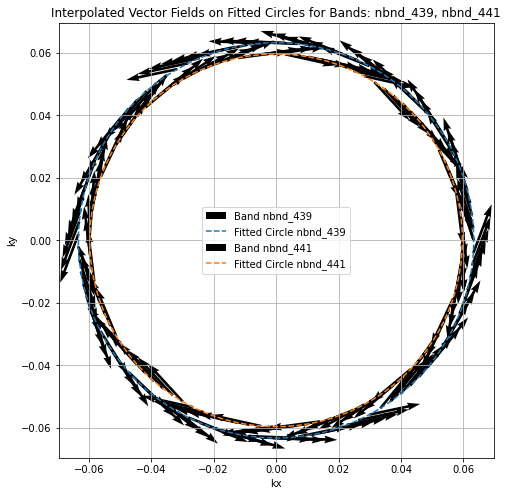

In [12]:
#interpolated sx sy are on kx ky which are fitted in the circle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import leastsq

# Load the Excel file
file_path = 'spin_expectations_at_iso-surface.csv'  # Update with your actual Excel file path
df = pd.read_csv(file_path)

# Extract unique bands from the 'band' column
unique_bands = df['band'].unique()

# Define the bands you want to plot (modify this list with the desired bands)
bands = ['nbnd_439', 'nbnd_441']  # Replace with your actual band names

# Filter unique bands to only include the ones in the 'bands' list
bands_to_plot = [band for band in unique_bands if band in bands]

# Define a function to fit a circle to kx, ky data points
def fit_circle(kx, ky):
    def calc_radius(params):
        xc, yc, r = params
        return np.sqrt((kx - xc) ** 2 + (ky - yc) ** 2) - r

    # Initial guess for circle center (xc, yc) and radius (r)
    x_m, y_m = np.mean(kx), np.mean(ky)
    r_initial = np.sqrt((kx - x_m) ** 2 + (ky - y_m) ** 2).mean()
    initial_guess = [x_m, y_m, r_initial]

    # Perform least-squares optimization to fit the circle
    circle_params, _ = leastsq(calc_radius, initial_guess)
    return circle_params

# Function to interpolate kx, ky, sx, sy values onto the circle
def interpolate_on_circle(kx, ky, values, x_circle, y_circle):
    interpolated_values = np.zeros_like(x_circle)
    for i in range(len(x_circle)):
        # Find the nearest kx, ky point to the circle point
        distances = np.sqrt((kx - x_circle[i]) ** 2 + (ky - y_circle[i]) ** 2)
        nearest_idx = np.argmin(distances)
        interpolated_values[i] = values[nearest_idx]
    return interpolated_values

# Initialize a figure to plot all bands together (optional)
plt.figure(figsize=(8, 8))

# Loop over each band in the filtered bands_to_plot list
for band_col in bands_to_plot:
    # Filter the dataframe to get data for this specific band
    df_band = df[df['band'] == band_col]

    # Extract kx, ky, sx, sy, sz for this band
    kx = df_band['kx'].values
    ky = df_band['ky'].values
    sx = df_band['sx'].values
    sy = df_band['sy'].values
    sz = df_band['sz'].values

    # Fit a circle to the kx, ky data points
    xc, yc, radius = fit_circle(kx, ky)
    print(f"Band: {band_col} -> Fitted circle center: ({xc}, {yc}), Radius: {radius}")

    # Generate points around the fitted circle
    theta = np.linspace(0, 2 * np.pi, 100)
    x_circle = xc + radius * np.cos(theta)
    y_circle = yc + radius * np.sin(theta)

    # Interpolate sx and sy values
    interpolated_sx = interpolate_on_circle(kx, ky, sx, x_circle, y_circle)
    interpolated_sy = interpolate_on_circle(kx, ky, sy, x_circle, y_circle)

    # Plot the vectors on the fitted circle for this band
    plt.quiver(x_circle, y_circle, interpolated_sx, interpolated_sy, scale=30, scale_units='xy', label=f'Band {band_col}')

    # Plot the fitted circle
    plt.plot(x_circle, y_circle, '--', label=f'Fitted Circle {band_col}')

# Label the axes
plt.xlabel('kx')
plt.ylabel('ky')

# Set the plot title
plt.title(f'Interpolated Vector Fields on Fitted Circles for Bands: {", ".join(bands_to_plot)}')

# Set equal scaling for x and y axes
plt.gca().set_aspect('equal', adjustable='box')

# Show legend for all bands
plt.legend()

# Show the grid
plt.grid(True)

# Show the plot
plt.show()